# Estadistica Aplicada
## Ricardo de Jesús Cervantes García 1958971
## 2 de noviembre

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [186]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import pmdarima as pm

In [235]:
datos=pd.read_csv('p.csv')

In [236]:
datos.dtypes

Periodos     object
IMCMI_SA    float64
dtype: object

In [237]:
datos['Periodos']=pd.to_datetime(datos['Periodos'],format='%Y/%m')

In [238]:
datos.isnull().sum()

Periodos    0
IMCMI_SA    0
dtype: int64

In [239]:
datos=datos.set_index('Periodos')
datos=datos.asfreq('MS')

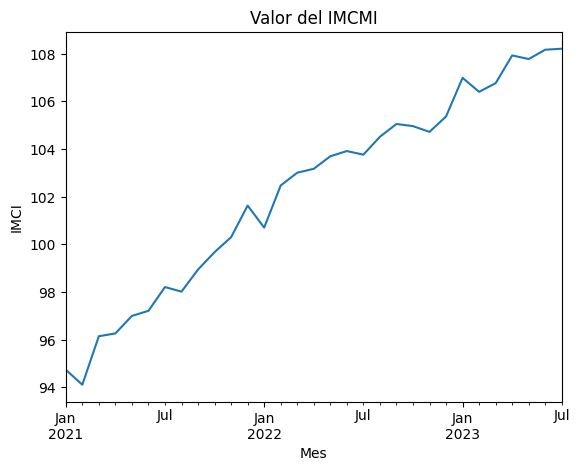

In [240]:
datos['IMCMI_SA'].plot()
plt.title('Valor del IMCMI')
plt.xlabel('Mes')
plt.ylabel('IMCI');

In [241]:
prueba_adf=adfuller(datos['IMCMI_SA'])
pvalue=prueba_adf[1]
pvalue.round(2)

0.23

No rechazamos H0, por lo que significa que el IMCMI es una serie no estacionaria.

In [242]:
datos['IMCMI_diff']=datos['IMCMI_SA'].diff()

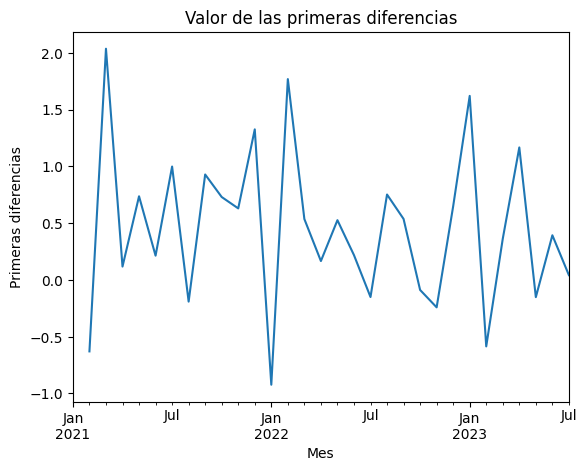

In [271]:
datos['IMCMI_diff'].plot()
plt.title('Valor de las primeras diferencias')
plt.xlabel('Mes')
plt.ylabel('Primeras diferencias');

In [244]:
prueba_adf=adfuller(datos['IMCMI_diff'].dropna())
pvalue=prueba_adf[1]
pvalue.round(2)

0.0

Rechazamos H0, por lo que significa que las priemras diferenicas si es una series estacionaria

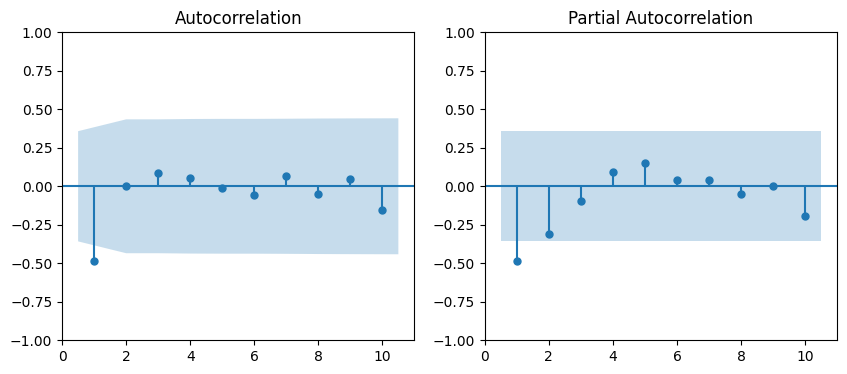

In [249]:
ig,ax=plt.subplots(1,2,figsize=(10,4))
plot_acf(datos['IMCMI_diff'].dropna(),zero=False,lags=10,ax=ax[0])
plot_pacf(datos['IMCMI_diff'].dropna(),zero=False,lags=10,ax=ax[1])
plt.show()

No tiene componente estacional

In [250]:
arimaorder_aic=pm.auto_arima(datos['IMCMI_SA'],start_p=1,max_p=7,start_q=1, max_q=7,information_criterio='aic',seasonal=False)
arimaorder_aic.params

<bound method ARIMA.params of ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True)>

In [252]:
arimaorder_aic=pm.auto_arima(datos['IMCMI_SA'],start_p=1,max_p=7,start_q=1, max_q=7,information_criterio='bic',seasonal=False)
arimaorder_aic.params

<bound method ARIMA.params of ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True)>

In [253]:
arimaorder_aic=pm.auto_arima(datos['IMCMI_SA'],start_p=1,max_p=7,start_q=1, max_q=7,information_criterio='hqic',seasonal=False)
arimaorder_aic.params

<bound method ARIMA.params of ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True)>

In [254]:
arimaorder_aic=pm.auto_arima(datos['IMCMI_SA'],start_p=1,max_p=7,start_q=1, max_q=7,information_criterio='oob',seasonal=False)
arimaorder_aic.params

<bound method ARIMA.params of ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True)>

In [255]:
ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(datos['IMCMI_SA'].dropna(), order=(ar, 1, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]
 
ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2


AR: 0, MA: 3
AR: 0, MA: 4
AR: 0, MA: 5


c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 0, MA: 6


c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4


c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 1, MA: 5
AR: 1, MA: 6


c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting pa

AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2


c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 2, MA: 3
AR: 2, MA: 4
AR: 2, MA: 5


c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 2, MA: 6


c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2


c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 3


c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 4
AR: 3, MA: 5


c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 6


c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2


c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 3


c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 4
AR: 4, MA: 5


c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting pa

AR: 4, MA: 6


c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 0
AR: 5, MA: 1
AR: 5, MA: 2


c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 3


c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 4


c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 5


c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 6


c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 0
AR: 6, MA: 1
AR: 6, MA: 2


c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 3


c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 4


c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 5


c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 6


c:\Users\Equip\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [256]:
ic.sort_values('AIC').head()

AIC        BIC
AR MA                      
1  2   63.803843  69.408633
   4   65.043472  73.450657
2  2   65.102700  72.108687
3  1   65.248500  72.254487
1  3   65.298149  72.304135

Voy a elegir el ARIMA(1,1,2) 

In [260]:
model=ARIMA(datos['IMCMI_SA'],order=(1,1,2))
results=model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:               IMCMI_SA   No. Observations:                   31
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 -27.902
Date:                Tue, 31 Oct 2023   AIC                             63.804
Time:                        17:02:01   BIC                             69.409
Sample:                    01-01-2021   HQIC                            65.597
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9936      0.017     59.073      0.000       0.961       1.027
ma.L1         -1.5114      0.197     -7.669      0.000      -1.898      -1.125
ma.L2          0.6059      0.199      3.039      0.0

<Axes: xlabel='Periodos'>

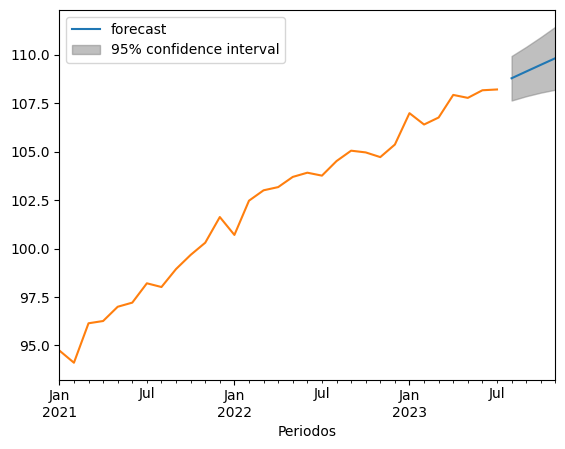

In [261]:
plot_predict(results,'2023-8-1','2023-11-1')
datos['IMCMI_SA'].plot()

In [262]:
datos.tail()

,IMCMI_SA,IMCMI_diff
Periodos,,
2023-03-01,106.762443,0.361856
2023-04-01,107.928291,1.165848
2023-05-01,107.775653,-0.152638
2023-06-01,108.168118,0.392465
2023-07-01,108.209387,0.041269


In [263]:
forecast=results.get_forecast(steps=4)
forecast_mean=forecast.predicted_mean
forecast_ci=forecast.conf_int()

In [264]:
inicio='2023-08-1'
fin='2023-11-1'

In [265]:
pronostico_valor=forecast_mean[inicio:fin]
pronostico_intervalos=forecast_ci.loc[inicio:fin]

In [266]:
df_pronostico=pd.DataFrame({'pronostico':pronostico_valor,
                            'limite inf':pronostico_intervalos.iloc[:,0],
                            'limite_sup':pronostico_intervalos.iloc[:,1]
})

In [267]:
df_pronostico

,pronostico,limite inf,limite_sup
2023-08-01,108.787799,107.639988,109.935610
2023-09-01,109.134974,107.860658,110.409290
2023-10-01,109.479933,108.045533,110.914333
2023-11-01,109.822689,108.198084,111.447294


In [268]:
print(f'pronosticamos que el valor del IMCMI_SA va estar en {df_pronostico.iloc[3,0].round(2)}\ny que con el 95% de confianza este estara entre {df_pronostico.iloc[3,1].round(2)} y {df_pronostico.iloc[3,2].round(2)}') 

pronosticamos que el valor del IMCMI_SA va estar en 109.82
y que con el 95% de confianza este estara entre 108.2 y 111.45
